#### Name: Kefan Zheng
#### StudentId: 9086175008
#### Email: kzheng58@wisc.edu

# Problem 1-1

define variables:  
$X_{ijk} \in \{0,1\}^{n \times n \times n}$: If entry $(i,j)$ is a $k$, $X_{ijk} = 1$, otherwise $X_{ijk} = 0$.


\begin{align}
\text{s.t.}\ & \sum_{k=1}^{n} X_{ijk} = 1,\;\; \forall i,j \in \{1,2,\ldots,n\} &\\
& \sum_{i=1}^{n} X_{ijk} = 1,\;\; \forall j,k \in \{1,2,\ldots,n\} &\\
& \sum_{j=1}^{n} X_{ijk} = 1,\;\; \forall i,k \in \{1,2,\ldots,n\} &\\
& \sum_{(i,j) \in c} X_{ijk} = 1,\;\; \forall c \in C, k \in \{1,2,\ldots,n\}&\\
& X_{ijk} = 1,\;\; \forall (i,j) \in F_k,\; \text{for each} \;\; k \in \{1,2,\ldots,n\} &\\
& X_{ijk} \in \{0, 1\},\;\; \forall i,j,k \in \{1,2,\ldots,n\} &\\
\end{align}

# Problem 1-2

In [1]:
# Given data. Unknown entries are specified as "0"
given = [
  0 6 0  1 0 4  0 5 0
  0 0 8  3 0 5  6 0 0
  2 0 0  0 0 0  0 0 1

  8 0 0  4 0 7  0 0 6
  0 0 6  0 0 0  3 0 0
  7 0 0  9 0 1  0 0 4

  5 0 0  0 0 0  0 0 2
  0 0 7  2 0 6  9 0 0
  0 4 0  5 0 8  0 7 0
];

In [2]:
# helper function to print a sudoku grid
function printSudoku(arr)
  u = 0
  println("+-------+-------+-------+")
  for p in 1:3:9
    for q in 0:2
      print("| ")
      for r in 1:3:9
        for s in 0:2
          u = round(Int, arr[p+q,r+s])
          u == 0 ? print(" ") : print(u)
          print(" ")
        end
        print("| ")
                end
      println()
    end
    println("+-------+-------+-------+")
  end
end
;
printSudoku(given)

+-------+-------+-------+
|   6   | 1   4 |   5   | 
|     8 | 3   5 | 6     | 
| 2     |       |     1 | 
+-------+-------+-------+
| 8     | 4   7 |     6 | 
|     6 |       | 3     | 
| 7     | 9   1 |     4 | 
+-------+-------+-------+
| 5     |       |     2 | 
|     7 | 2   6 | 9     | 
|   4   | 5   8 |   7   | 
+-------+-------+-------+


In [3]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, x[1:9,1:9,1:9], Bin)

# exactly one number per cell
for i in 1:9
  for j in 1:9
    @constraint(m, sum(x[i,j,k] for k in 1:9) == 1)
  end
end

# exactly one of each number per row
for i in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for j in 1:9) == 1)
  end
end

# exactly one of each number per column
for j in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for i in 1:9) == 1)
  end
end

# exactly one of each number per 3x3 block
for k in 1:9
  for p in 0:3:6
    for q in 0:3:6
      @constraint(m, sum(x[p+i,q+j,k] for i in 1:3, j in 1:3) == 1)
    end
  end
end

# initial conditions
for i in 1:9
  for j in 1:9
    if given[i,j] != 0
      @constraint(m, x[i,j,given[i,j]] == 1)
    end
  end
end

@time(optimize!(m))

# if termination_status(m) != :OPTIMAL
#     println(termination_status(m))
# else
    #generate solution grid and display the solution
    solution = zeros(9,9)
    for i in 1:9
      for j in 1:9
        for k in 1:9
          if value(x[i,j,k]) == 1
            solution[i,j] = k
            continue
          end
        end
      end
    end

    println("The given problem is: ")
    printSudoku(given)

    println("The solution is: ")
    printSudoku(solution)
# end

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [0e+00, 0e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+00]
Presolving model
324 rows, 699 cols, 2796 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Solving report
  Status            Optimal
  Primal bound      0
  Dual bound        0
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    0 (objective)
                    0 (bound viol.)
                    0 (int. viol.)
                    0 (row viol.)
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.)
                    0 (separation)
                    0 (heuristics)
  0.129346 seconds (197.17 k allocations: 13.741 MiB, 63.90% gc time, 97.88% compilation time: 98% of which was recompilation)


# Problem 1-3

In this problem, $n = 9$ and $K = 24$.

\begin{align}
\underset{}{\max}\ & \sum_{i=1}^{n} \sum_{k=1}^{n} k*X_{iik} &\\
\text{s.t.}\ & \sum_{k=1}^{n} X_{ijk} = 1,\;\; \forall i,j \in \{1,2,\ldots,n\} &\\
& \sum_{i=1}^{n} X_{ijk} = 1,\;\; \forall j,k \in \{1,2,\ldots,n\} &\\
& \sum_{j=1}^{n} X_{ijk} = 1,\;\; \forall i,k \in \{1,2,\ldots,n\} &\\
& \sum_{(i,j) \in c} X_{ijk} = 1,\;\; \forall c \in C, k \in \{1,2,\ldots,n\}&\\
& \sum_{k=1}^{n} \sum_{(i,j) \in F_k} X_{ijk} \geq K &\\
& X_{ijk} \in \{0, 1\},\;\; \forall i,j,k \in \{1,2,\ldots,n\} &\\
\end{align}

# Problem 1-4

In [4]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, x[1:9,1:9,1:9], Bin)

@objective(m, Max, sum(k*x[i,i,k] for i in 1:9 for k in 1:9))

# exactly one number per cell
for i in 1:9
  for j in 1:9
    @constraint(m, sum(x[i,j,k] for k in 1:9) == 1)
  end
end

# exactly one of each number per row
for i in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for j in 1:9) == 1)
  end
end

# exactly one of each number per column
for j in 1:9
  for k in 1:9
    @constraint(m, sum(x[i,j,k] for i in 1:9) == 1)
  end
end

# exactly one of each number per 3x3 block
for k in 1:9
  for p in 0:3:6
    for q in 0:3:6
      @constraint(m, sum(x[p+i,q+j,k] for i in 1:3, j in 1:3) == 1)
    end
  end
end

# initial conditions
@constraint(m, sum(x[i,j,given[i,j]] for i in 1:9 for j in 1:9 if given[i,j] != 0) >= 24)

@time(optimize!(m))

# if termination_status(m) != :OPTIMAL
#     println(termination_status(m))
# else
    #generate solution grid and display the solution
    solution = zeros(9,9)
    for i in 1:9
      for j in 1:9
        for k in 1:9
          if value(x[i,j,k]) >= 0.5
            solution[i,j] = k
            continue
          end
        end
      end
    end

    println("The given problem is: ")
    printSudoku(given)

    println("The solution is: ")
    printSudoku(solution)

    println("The maximum sum of diagonal elements: ")
    println(objective_value(m))
# end

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [1e+00, 9e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 2e+01]
Presolving model
325 rows, 729 cols, 2946 nonzeros  0s
325 rows, 729 cols, 2946 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   325 rows
   729 cols (729 binary, 0 integer, 0 implied int., 0 continuous)
   2946 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   135             -inf                 inf        0      0      0         0     0.0s
         0       0         0   0.00%   67.6            -inf                 inf        0      0      4       585     0.0s
 R       0       0         0   0.00%   67.321

# Problem 1-5

define new variable:  
$z$: indicate whether there are 2 or more "9"s on the main diagonal.  
$$
z =
\begin{cases}
1 & \text{if } \sum_{i=1}^{n} X_{ii9} \geq 2 \\
0 & \text{otherwise}
\end{cases}
$$
new requirements:  
$$
\sum_{i=1}^{n} X_{ii9} \geq 2 \implies z = 1
$$
$$
\sum_{i=1}^{n} X_{ii9} \lt 2 \implies z = 0
$$
$$
z = 1 \implies \sum_{i=1}^{n} X_{ii5} \geq 3
$$
$$
z = 1 \implies \sum_{i=1}^{n} X_{ii5} \leq 3
$$

new constraints ($n = 9$ in this problem):  
\begin{align}
\text{s.t.}\ & \sum_{i=1}^{n} X_{ii9} - 2 \leq (n-2)z &\\
& \sum_{i=1}^{n} X_{ii9} - 2 \gt -2(1-z) &\\
& \sum_{i=1}^{n} X_{ii5} - 3 \leq (n-3)(1-z) &\\
& \sum_{i=1}^{n} X_{ii5} - 3 \geq -3(1-z) &\\
\end{align}


# Problem 2-1

Define the following sets:  
$G = \{Maxine, Mabel, Mavis, Millie, Martha\}$  
$D = \{Carla, Carol, Cindy, Cathy, Caren\}$  
$H = \{John, Jake, Jack, Joe, Jason\}$  
$S = \{Tom, Tex, Tim, Tip, Tab\}$  
Define the following variables:  
$$
xD_{g,d} =
\begin{cases}
1 & \text{if Grandma} \; g \in G \; \text{has Daughter} \; d \in D \\
0 & \text{otherwise}
\end{cases}
$$
$$
xH_{g,h} =
\begin{cases}
1 & \text{if Grandma} \; g \in G \; \text{has Son-In-Law} \; h \in H \\
0 & \text{otherwise}
\end{cases}
$$
$$
xS_{g,s} =
\begin{cases}
1 & \text{if Grandma} \; g \in G \; \text{has Grandson} \; s \in S \\
0 & \text{otherwise}
\end{cases}
$$

Model:  
\begin{align}
\text{s.t.}\ & \sum_{d \in D} xD_{g,d} = 1,\;\; \forall g \in G &\\
& \sum_{g \in G} xD_{g,d} = 1,\;\; \forall d \in D &\\
& \sum_{h \in H} xH_{g,h} = 1,\;\; \forall g \in G &\\
& \sum_{g \in G} xH_{g,h} = 1,\;\; \forall h \in H &\\
& \sum_{s \in S} xS_{g,s} = 1,\;\; \forall g \in G &\\
& \sum_{g \in G} xS_{g,s} = 1,\;\; \forall s \in S &\\
& xD_{Maxine, Carla} = 0 &\\
& xH_{Mavis, Jack} = 0 &\\
& xD_{g, Cathy} = xH_{g, Joe}, \forall g \in G &\\
& xD_{g, Cathy} + xS_{g, Tab} \leq 1, \forall g \in G &\\
& xD_{g, Carol} + xS_{g, Tim} \leq 1, \forall g \in G &\\
& xD_{g, Carla} + xS_{g, Tim} \leq 1, \forall g \in G &\\
& xD_{g, Cindy} = xH_{g, Jake}, \forall g \in G &\\
& xD_{g, Cindy} = xS_{g, Tim}, \forall g \in G &\\
& xD_{Mabel, Carla} = 0 &\\
& xD_{Millie, Carla} = 0 &\\
& xD_{Martha, Carla} = 0 &\\
& xD_{Mabel, Carol} = 0 &\\
& xD_{Millie, Carol} = 0 &\\
& xD_{Martha, Carol} = 0 &\\
& xH_{Martha, John} = 0 &\\
& xD_{g, Caren} = xH_{g, John}, \forall g \in G &\\
& xD_{g, Caren} = xS_{g, Tom}, \forall g \in G &\\
& xH_{Millie, Joe} + xH_{Millie, Jason} = 1 &\\
& xS_{Millie, Tip} + xS_{Millie, Tab} = 1 &\\
& xS_{Mavis, Tab} = 0 &\\
& xD_{g,d} \in \{0,1\}, \; \forall g \in G, d \in D &\\
& xH_{g,h} \in \{0,1\}, \; \forall g \in G, h \in H &\\
& xS_{g,s} \in \{0,1\}, \; \forall g \in G, s \in S &\\
\end{align}

# Problem 2-2

In [5]:
G = [:Maxine, :Mabel, :Mavis, :Millie, :Martha]
D = [:Carla, :Carol, :Cindy, :Cathy, :Caren ]
H = [:John, :Jake, :Jack, :Joe, :Jason ]
S = [:Tom, :Tex, :Tim, :Tip, :Tab ]

m = Model(HiGHS.Optimizer)
# set_silent(m)

@variable(m, xD[G,D], Bin) # 1 iff grandma g has daughter d
@variable(m, xH[G,H], Bin) # 1 iff grandma g has (son-in-law) (daughter’s husband) h
@variable(m, xS[G,S], Bin) # 1 iff grandma g has grandson s

for g in G
    @constraint(m, sum(xD[g, :]) == 1)
    @constraint(m, sum(xH[g, :]) == 1)
    @constraint(m, sum(xS[g, :]) == 1)
end

for d in D
    @constraint(m, sum(xD[:, d]) == 1)
end

for h in H
    @constraint(m, sum(xH[:, h]) == 1)
end

for s in S
    @constraint(m, sum(xS[:, s]) == 1)
end

@constraint(m, xD[:Maxine, :Carla] == 0)
@constraint(m, xH[:Mavis, :Jack] == 0)
for g in G
    @constraint(m, xD[g, :Cathy] == xH[g, :Joe])
    
    @constraint(m, xD[g, :Cathy] + xS[g, :Tab] <= 1)

    @constraint(m, xD[g, :Carol] + xS[g, :Tim] <= 1)

    @constraint(m, xD[g, :Carla] + xS[g, :Tim] <= 1)

    @constraint(m, xD[g, :Cindy] == xH[g, :Jake])

    @constraint(m, xD[g, :Cindy] == xS[g, :Tim])

    @constraint(m, xD[g, :Caren] == xH[g, :John])

    @constraint(m, xD[g, :Caren] == xS[g, :Tom])
end
@constraint(m, xD[:Mabel, :Carla] == 0)
@constraint(m, xD[:Millie, :Carla] == 0)
@constraint(m, xD[:Martha, :Carla] == 0)
@constraint(m, xD[:Mabel, :Carol] == 0)
@constraint(m, xD[:Millie, :Carol] == 0)
@constraint(m, xD[:Martha, :Carol] == 0)
@constraint(m, xH[:Martha, :John] == 0)
@constraint(m, xH[:Millie, :Joe] + xH[:Millie, :Jason] == 1)
@constraint(m, xS[:Millie, :Tip] + xS[:Millie, :Tab] == 1)
@constraint(m, xS[:Mavis, :Tab] == 0)

@time(optimize!(m))

function printGrandmaSolution(xD, xH, xS)
    for g in G
        grandma = g
        daughter = :Unknown
        son_in_law = :Unknown
        grandson = :Unknown
        
        for d in D
            if value(xD[g,d]) > 0.5
                daughter = d
            end
        end
        for h in H
            if value(xH[g,h]) > 0.5
                son_in_law = h
            end
        end
        for s in S
            if value(xS[g,s]) > 0.5
                grandson = s
            end
        end
        println("Grandma ", g, " has daughter ", daughter, " son-in-law ", son_in_law,
        " and grandson ", grandson)
    end
end;
println()
printGrandmaSolution(value.(xD), value.(xH), value.(xS))

Running HiGHS 1.7.0 (git hash: 50670fd4c): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [0e+00, 0e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+00]
Presolving model
34 rows, 36 cols, 124 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Solving report
  Status            Optimal
  Primal bound      0
  Dual bound        0
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    0 (objective)
                    0 (bound viol.)
                    0 (int. viol.)
                    0 (row viol.)
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.)
                    0 (separation)
                    0 (heuristics)
  0.000494 seconds (1.25 k allocations: 156.398 KiB)

Grandma Maxine has daughter Carol son-in-law Jack and grandson Tab
Grandma M

# Problem 3-1

Define variables:  
$N \text{(given)}$: district sets  
$p_{i} \text{(given)}$: population of district i   
$t_{ij} \text{(given)}$: the time required to travel from one district to another  
$x_i$: indicate whether or not each district is assigned as an auror location.
$$
x_i =
\begin{cases}
1 & \text{district i is assigned as an auror location} \\
0 & \text{otherwise}
\end{cases}
$$
$y_i$: indicate whether district i is protected.
$$
y_i =
\begin{cases}
1 & \text{district i is protected (within 2 seconds, there is a district assigned with an auror)} \\
0 & \text{otherwise}
\end{cases}
$$
$z_{ij}$: whether this district is within 2 seconds from another district.
$$
z_{ij} =
\begin{cases}
1 & \text{district i is within 2 seconds from district j} \\
0 & \text{otherwise}
\end{cases}
$$

Specific Model:  
In this problem,   
$$N = 8$$
$$p_i = [40, 30, 35, 20, 15, 50, 45, 60]$$
$$
t_{ij} = 
\begin{bmatrix}
0 & 3 & 4 & 6 & 1 & 9 & 8 & 10\\
3 & 0 & 5 & 4 & 8 & 6 & 1 & 9\\
4 & 5 & 0 & 2 & 2 & 3 & 5 & 7\\
6 & 4 & 2 & 0 & 3 & 2 & 5 & 4\\
1 & 8 & 2 & 3 & 0 & 2 & 2 & 4\\
9 & 6 & 3 & 2 & 2 & 0 & 3 & 2\\
8 & 1 & 5 & 5 & 2 & 3 & 0 & 2\\
10 & 9 & 7 & 4 & 4 & 2 & 2 & 0
\end{bmatrix}
$$

\begin{align}
\underset{}{\max}\ & \sum_{i=1}^{8} p_{i}y_{i} &\\
\text{s.t.}\ & \sum_{i=1}^{8} x_i = 3 &\\
& t_{ij} - 2 \geq -2z_{ij}, \; \forall i,j \in \{1,\ldots,8\} &\\
& t_{ij} - 2 \leq 8(1-z_{ij}), \; \forall i,j \in \{1,\ldots,8\} &\\
& y_{i} \leq \sum_{j=1}^{8} z_{ij}*x_{j}, \; \forall i \in \{1,\ldots,8\} &\\
& x_i \in \{0,1\},\; y_i \in \{0,1\}, \; \forall i \in \{1,\ldots,8\} &\\
& z_{ij} \in \{0,1\}, \; \forall i,j \in \{1,\ldots,8\} &\\
\end{align}

# Problem 3-2

In [6]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
# set_silent(m)

N = 8
p = [40 30 35 20 15 50 45 60]
t = [
    0 3 4 6 1 9 8 10
    3 0 5 4 8 6 1 9
    4 5 0 2 2 3 5 7
    6 4 2 0 3 2 5 4
    1 8 2 3 0 2 2 4
    9 6 3 2 2 0 3 2
    8 1 5 5 2 3 0 2
    10 9 7 4 4 2 2 0
]

@variable(m, x[1:N], Bin)
@variable(m, y[1:N], Bin)
@variable(m, z[1:N, 1:N], Bin)

@objective(m, Max, sum(p[i] * y[i] for i in 1:N))

@constraint(m, sum(x) == 3)
for i in 1:N
    for j in 1:N
        @constraint(m, t[i,j] - 2 >= -2 * z[i,j])
        @constraint(m, t[i,j] - 2 <= 8 * (1 - z[i,j]))
    end
    @constraint(m, y[i] <= sum(z[i, j] * x[j] for j in 1:N))
end

@time(optimize!(m))

println()
auror = [value(x[i]) for i in 1:N]
println("The auror status is: ", auror)

district = [i for i in 1:N if auror[i] >= 0.5]
println("Best three locations for aurors are: ", district)

println("The maximum number of people(thousand): ", objective_value(m))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-05
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 129 rows, 80 columns and 136 nonzeros
Model fingerprint: 0x50aff470
Model has 8 quadratic constraints
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [2e+01, 6e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 126 rows and 50 columns
Presolve time: 0.00s
Presolved: 37 rows, 44 columns, 98 nonzeros
Variable types: 0 continuous, 44 integer (44 binary)
Found heuristic solution: objective 295.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 8 (of 8 available proc

# Problem 4-1

Define variables:  
$N$: number of sets     
$C$: customer sets  
$S$: feasible single trip sets  
$t_j$: required time for trip j    
$x_j$: binary variable, indicate whether the j-th trip(set) is selected  
$z_{ij}$: binary variable, indicate whether customer i is contained in the trip j  

Model:  
In this problem,
$$N = 18$$
$$C = \{1,2,3,4,5,6\}$$
$$S = \{\{1\}, \{2\}, \{3\}, \{4\}, \{5\}, \{6\},\{1, 3\}, \{1, 5\}, \{2, 3\}, \{2, 4\}, \{2, 5\}, \{3, 4\}, \{3, 5\}, \{3, 6\}, \{4, 5\}, \{4, 6\}, \{5, 6\}, \{3, 4, 5\}\}$$
$$t_j = [36, 18, 22, 28, 42, 24, 45, 44, 29, 29, 43, 39, 53, 45, 42, 35, 45, 53]$$
<!-- $$
z_{ij} =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 & 0
\end{bmatrix}
$$ -->
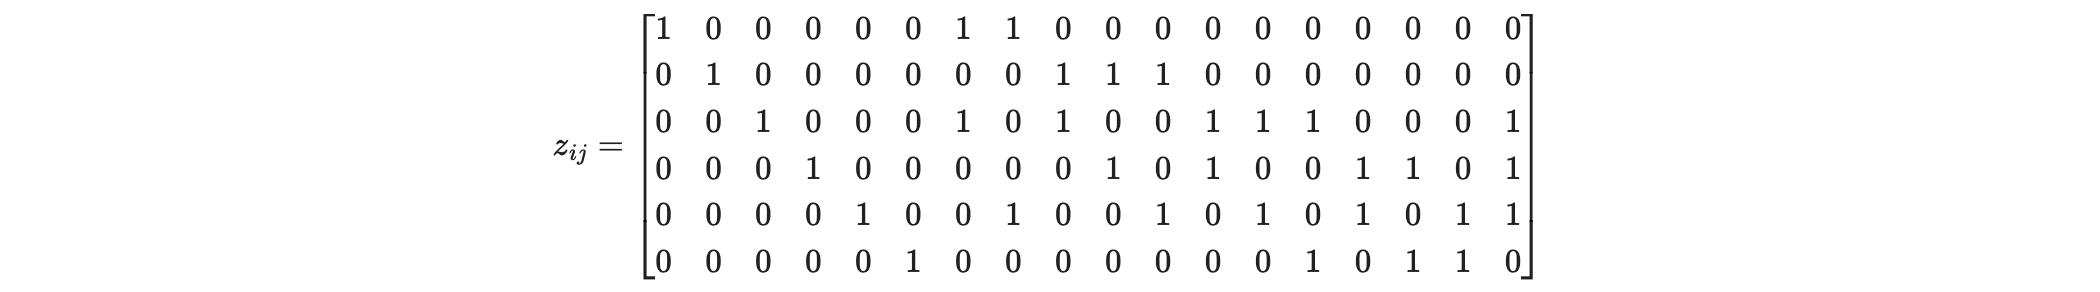

\begin{align}
\underset{}{\min}\ & \sum_{i=1}^{18} t_{i}x_{i} &\\
\text{s.t.}\ & \sum_{j=1}^{18} z_{ij}*x_{j} = 1, \; \forall i \in C &\\
& x_i \in \{0,1\}, \; \forall i \in \{1,\ldots,18\} &\\
\end{align}

# Problem 4-2

In [7]:
using JuMP, Gurobi

N = 18
C = [1 2 3 4 5 6]
S = Dict(1=>[1], 2=>[2], 3=>[3], 4=>[4], 5=>[5], 6=>[6], 7=>[1 3], 8=>[1 5], 9=>[2 3], 10=>[2 4], 
    11=>[2 5], 12=>[3 4], 13=>[3 5], 14=>[3 6], 15=>[4 5], 16=>[4 6], 17=>[5 6], 18=>[3 4 5])
t = [36 18 22 28 42 24 45 44 29 29 43 39 53 45 42 35 45 53]
Z = [
    1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
    0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
    0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1
    0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1
    0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1
    0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
]

m = Model(Gurobi.Optimizer)
set_silent(m)

@variable(m, x[1:N], Bin)

@objective(m, Min, sum(t[i] * x[i] for i in 1:N))

for i in C
    @constraint(m, sum(Z[i, j]*x[j] for j in 1:N) == 1)
end

@time(optimize!(m))

set_id = [i for i in 1:N if value(x[i]) >= 0.5]
println("set selected: ", set_id)
println()
total_time = 0
println("Trip explanation: ")
for i in 1:length(set_id)
    trip = S[set_id[i]]
    cost = t[set_id[i]]
    total_time += cost
    print("Trip ", i, ": O->",)
    for j in trip
        print("C"*string(j)*"->")
    end
    print("O, Time cost(minutes): ", cost)
    println()
end
println("Total time cost: ", total_time)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-05
  0.001197 seconds (377 allocations: 24.953 KiB)
set selected: [8, 9, 16]

Trip explanation: 
Trip 1: O->C1->C5->O, Time cost(minutes): 44
Trip 2: O->C2->C3->O, Time cost(minutes): 29
Trip 3: O->C4->C6->O, Time cost(minutes): 35
Total time cost: 108


# Problem 5-1

Define variables:  
$b_{i} \text{(given)}$: blending time for batch i  
$c_{ij} \text{(given)}$: cleaning time after batch i if it is followed by batch j  
$x_{ij}$: whether batch i is followed by batch j  
$u_i$: relative position of batch i in the optimal solution  

Model (assuming the first batch starts from 1, it doesn't affect the order of the optimal solution):  
In this problem,
$$b_i = [40, 35, 45, 32, 50]$$
$$
c_{ij} = 
\begin{bmatrix}
0 & 11 & 7 & 13 & 11\\5 & 0 & 13 & 15 & 15\\13 & 15 & 0 & 23 & 11\\9 & 13 & 5 & 0 & 3\\3 & 7 & 7 & 7 & 0
\end{bmatrix}
$$

\begin{align}
\underset{}{\min}\ & \sum_{i=1}^{5} b_{i} + \sum_{i=1}^{5} \sum_{j=1}^{5} c_{ij}x_{ij} &\\
\text{s.t.}\ & \sum_{i=1}^{5} x_{ij} = 1,\; \forall j \in \{1,\ldots,5\} &\\
& \sum_{j=1}^{5} x_{ij} = 1,\; \forall i \in \{1,\ldots,5\} &\\
& x_{ii} = 0,\; \forall i \in \{1,\ldots,5\} &\\
& 1 \leq u_i \leq 5,\; \forall i \in \{1,\ldots,5\} &\\
& u_i - u_j + 5x_{ij} \leq 4,\; \forall i, \; \forall j \neq 1 &\\
\end{align}

# Problem 5-2

In [8]:
function getSeq(x, start, N)
    subtour = [start]
    while true
        j = subtour[end]
        for k in 1:N
            if x[j,k] >= 0.5
                push!(subtour, k)
                break
            end
        end
        if subtour[end] == start
            break
        end
    end
    return subtour
end

getSeq (generic function with 1 method)

In [9]:
using JuMP, Gurobi

N = 5
b = [40 35 45 32 50]
c = [
    0 11 7 13 11
    5 0 13 15 15
    13 15 0 23 11
    9 13 5 0 3
    3 7 7 7 0
]

m = Model(Gurobi.Optimizer)
set_silent(m)

@variable(m, x[1:N, 1:N], Bin)

@objective(m, Min, sum(b[i] for i in 1:N) + sum( c[i,j]*x[i,j] for i in 1:N, j in 1:N ))

# one out-edge
@constraint(m, c1[j in 1:N], sum( x[i,j] for i in 1:N ) == 1)   
# one in-edge
@constraint(m, c2[i in 1:N], sum( x[i,j] for j in 1:N ) == 1) 
# no self-loops         
@constraint(m, c3[i in 1:N], x[i,i] == 0 )                                 

# MTZ variables and constraints
@variable(m, u[1:N])
@constraint(m, c4[i in 1:N, j in 2:N], u[i] - u[j] + N*x[i,j] <= N-1 )

optimize!(m)
xx = value.(x)
order = getSeq(xx, 1, N)  # get cycle containing Atlanta
println("Order of production: ", order)
println("Minimum cleaning time: ", objective_value(m)-sum(b))
println("Minimum production time: ", objective_value(m))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-05
Order of production: [1, 4, 3, 5, 2, 1]
Minimum cleaning time: 41.0
Minimum production time: 243.0
